## Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
from sklearn.tree import DecisionTreeClassifier

## Reading dataset showing info and statistics about our dataset 

In [3]:
df = pd.read_csv(r'D:\Bank churn prediction\Bank Customer Churn Prediction.csv')

In [4]:
df

customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
df.describe()

customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.492818   
min           1.000000      0.00000       0.000000         11.580000   
25%           1.000000      0.00000       0.000000      51002.110000   
50%           1.000000      1.00000       1.000000     100193.915000   
75%           2.000000      1.00000       1.000000     149388.247500   
max           4.000000      1.00000       1.000000     199992.480000   

              churn  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

## Exploratory data analysis

In [7]:
correlation = df.corr()
sns.heatmap(correlation, annot = True)
plt.figure(figsize = (14,7))

<Figure size 1008x504 with 0 Axes>

<Figure size 1008x504 with 0 Axes>

<AxesSubplot:xlabel='churn', ylabel='count'>

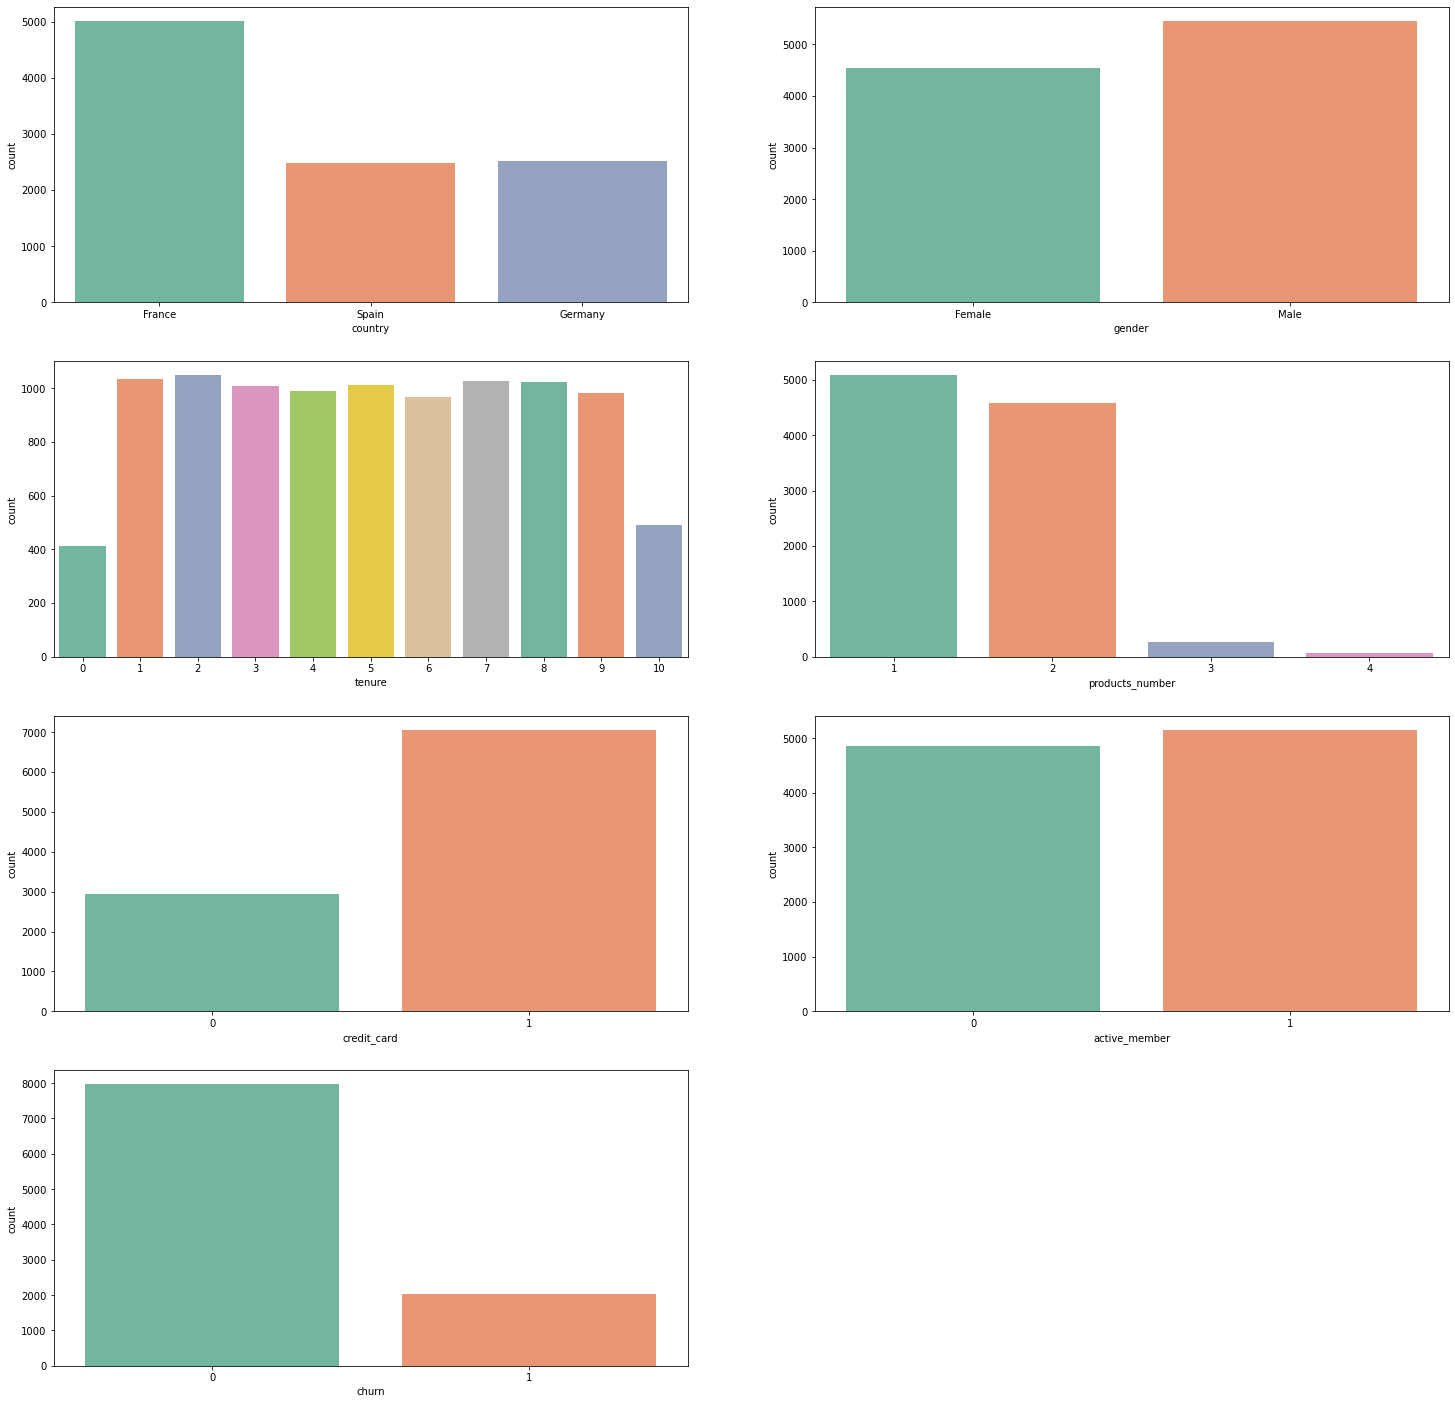

In [8]:
plt.figure(figsize = (25,25))

plt.subplot(4,2,1)
sns.countplot(x = 'country', palette='Set2', data = df)

plt.subplot(4,2,2)
sns.countplot(x = 'gender', palette='Set2', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'tenure', palette='Set2', data = df)

plt.subplot(4,2,4)
sns.countplot(x = 'products_number', palette='Set2', data = df)

plt.subplot(4,2,5)
sns.countplot(x = 'credit_card', palette='Set2', data = df)

plt.subplot(4,2,6)
sns.countplot(x = 'active_member', palette='Set2', data = df)

plt.subplot(4,2,7)
sns.countplot(x = 'churn', palette='Set2', data = df)

In [9]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [10]:
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [11]:
df['tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64

In [12]:
df['products_number'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

In [13]:
df['credit_card'].value_counts()

1    7055
0    2945
Name: credit_card, dtype: int64

In [14]:
df['active_member'].value_counts()

1    5151
0    4849
Name: active_member, dtype: int64

In [15]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

C:\Users\ahmed.ismail\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ahmed.ismail\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ahmed.ismail\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

<AxesSubplot:xlabel='estimated_salary'>

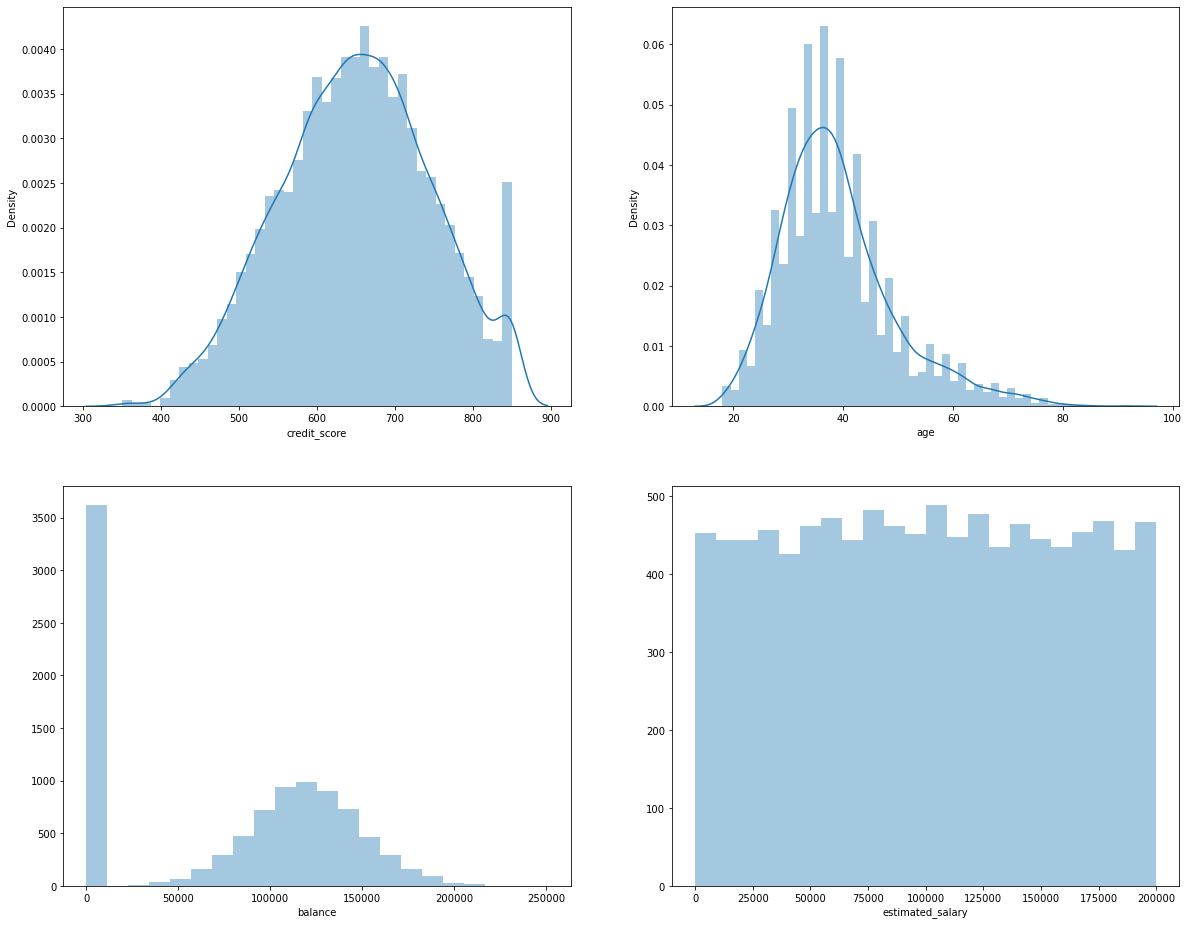

In [16]:
plt.figure(figsize = (20,25))

plt.subplot(3,2,1)
sns.distplot(df['credit_score'])

plt.subplot(3,2,2)
sns.distplot(df['age'])

plt.subplot(3,2,3)
sns.distplot(df['balance'], kde = False)

plt.subplot(3,2,4)
sns.distplot(df['estimated_salary'], kde = False)

In [17]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'churn', hue= 'country', palette='Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'churn', hue= 'gender', palette='Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'churn', hue= 'tenure', palette='Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'churn', hue= 'products_number', palette='Set2', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'churn', hue= 'credit_card', palette='Set2', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'churn', hue= 'active_member', palette='Set2', data = df)

<AxesSubplot:xlabel='churn', ylabel='count'>

In [18]:
sns.boxplot(data =df ,x='churn' ,y='credit_score')

<AxesSubplot:xlabel='churn', ylabel='credit_score'>

<AxesSubplot:xlabel='churn', ylabel='age'>

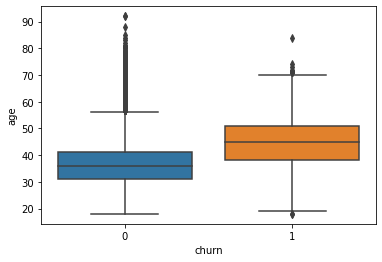

In [19]:
sns.boxplot(data =df ,x='churn' ,y="age")

In [20]:
sns.boxplot(data=df ,x='churn',y='balance')

<AxesSubplot:xlabel='churn', ylabel='balance'>

<AxesSubplot:xlabel='churn', ylabel='estimated_salary'>

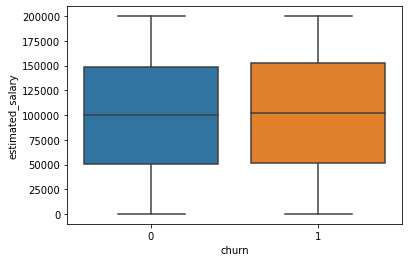

In [21]:
sns.boxplot(data=df ,x='churn',y='estimated_salary')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [23]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [68]:
df.duplicated().sum()

0

In [24]:
df.dropna(inplace=True)

## Showing the correlation of the dataset with our target

In [25]:
df.corr()['churn']

customer_id        -0.006248
credit_score       -0.027094
age                 0.285323
tenure             -0.014001
balance             0.118533
products_number    -0.047820
credit_card        -0.007138
active_member      -0.156128
estimated_salary    0.012097
churn               1.000000
Name: churn, dtype: float64

## Dropping unnecessary columns that may flactuate the models prediction

In [26]:
df.drop(columns=['customer_id','credit_card'],inplace=True)

In [27]:
df

credit_score  country  gender  age  tenure    balance  products_number  \
0              619   France  Female   42       2       0.00                1   
1              608    Spain  Female   41       1   83807.86                1   
2              502   France  Female   42       8  159660.80                3   
3              699   France  Female   39       1       0.00                2   
4              850    Spain  Female   43       2  125510.82                1   
...            ...      ...     ...  ...     ...        ...              ...   
9995           771   France    Male   39       5       0.00                2   
9996           516   France    Male   35      10   57369.61                1   
9997           709   France  Female   36       7       0.00                1   
9998           772  Germany    Male   42       3   75075.31                2   
9999           792   France  Female   28       4  130142.79                1   

      active_member  estimated_salary  churn  
0                 1         101348.88      1  
1                 1         112542.58      0  
2                 0         113931.57      1  
3                 0          93826.63      0  
4                 1          79084.10      0  
...             ...               ...    ...  
9995              0          96270.64      0  
9996              1         101699.77      0  
9997              1          42085.58      1  
9998              0          92888.52      1  
9999              0          38190.78      0  

[10000 rows x 10 columns]

## Encoding the categorical columns

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [29]:
labelencoder= LabelEncoder()


In [30]:
df['country']=labelencoder.fit_transform(df['country'])
df['gender']=labelencoder.fit_transform(df['gender'])

In [31]:
Encoded_Columns = ['country', 'gender']

In [32]:
Encoder = ColumnTransformer(  
    transformers=[("labelencoder",LabelEncoder())],remainder="passthrough")

In [33]:
df

credit_score  country  gender  age  tenure    balance  products_number  \
0              619        0       0   42       2       0.00                1   
1              608        2       0   41       1   83807.86                1   
2              502        0       0   42       8  159660.80                3   
3              699        0       0   39       1       0.00                2   
4              850        2       0   43       2  125510.82                1   
...            ...      ...     ...  ...     ...        ...              ...   
9995           771        0       1   39       5       0.00                2   
9996           516        0       1   35      10   57369.61                1   
9997           709        0       0   36       7       0.00                1   
9998           772        1       1   42       3   75075.31                2   
9999           792        0       0   28       4  130142.79                1   

      active_member  estimated_salary  churn  
0                 1         101348.88      1  
1                 1         112542.58      0  
2                 0         113931.57      1  
3                 0          93826.63      0  
4                 1          79084.10      0  
...             ...               ...    ...  
9995              0          96270.64      0  
9996              1         101699.77      0  
9997              1          42085.58      1  
9998              0          92888.52      1  
9999              0          38190.78      0  

[10000 rows x 10 columns]

In [34]:
x=df.drop('churn',axis=1)
y=df['churn']

## Our Target is not balanced so we need to balance it using random over sampler

In [36]:
from imblearn.over_sampling import RandomOverSampler


In [37]:
ros = RandomOverSampler(random_state=0)

In [38]:
x, y = ros.fit_resample(x, y)

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
#from sklearn.model_selection import train_test_split

In [42]:
#x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,stratify=y,random_state=7)

In [43]:
#x_train.shape,x_test.shape

In [44]:
!pip install xgboost

## Importing our models , pipeline and cross validation from sklearn

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

In [46]:
models = list()
models.append(("LR",LogisticRegression()))
models.append(("MNB",MultinomialNB()))
models.append(("GNB",GaussianNB()))
models.append(("SVM",SVC()))
models.append(("CART",DecisionTreeClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("XG",XGBClassifier()))

In [47]:
for model in models:
    steps = list()
    steps.append(("scaler" , MinMaxScaler()))
    steps.append(model)
    pipeline = Pipeline(steps = steps)
    scores = cross_validate(pipeline , x , y , cv = 5  , scoring="accuracy" , return_train_score=True)
    print(model[0])
    print("Train_accuracy", scores["train_score"].mean())
    print("Test_accuracy" , scores["test_score"].mean())
    print("-" * 25)

LR
Train_accuracy 0.6927194386113287
Test_accuracy 0.691886678472635
-------------------------
MNB
Train_accuracy 0.6281865562874006
Test_accuracy 0.6291590267861454
-------------------------
GNB
Train_accuracy 0.7318221795247595
Test_accuracy 0.7321984821742691
-------------------------
SVM
Train_accuracy 0.7910963123906714
Test_accuracy 0.7818032778807598
-------------------------
CART
Train_accuracy 1.0
Test_accuracy 0.9246514726417875
-------------------------
RF
Train_accuracy 1.0
Test_accuracy 0.9547912817162212
-------------------------
XG
Train_accuracy 0.9533310600507614
Test_accuracy 0.8967723783704413
-------------------------


## Random forest classifier is selected as it reached the highest accuracy for training and testing

In [48]:
steps = list()
steps.append(("Scaler" , MinMaxScaler()))
steps.append(("RF" , RandomForestClassifier()))
pipeline = Pipeline(steps = steps)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=7)

In [51]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('Scaler', MinMaxScaler()), ('RF', RandomForestClassifier())])

In [52]:
import joblib

In [53]:
joblib.dump(pipeline,'rfpipeline.joblib')

['rfpipeline.joblib']

In [54]:
y_train_pred= pipeline.predict(x_train)

In [55]:
y_test_pred = pipeline.predict(x_test)

In [56]:
accuracy_score(y_train,y_train_pred)

1.0

In [57]:
accuracy_score(y_test,y_test_pred)

0.9483047300125576

In [60]:
f1_score(y_train,y_train_pred)

1.0

In [61]:
f1_score(y_test,y_test_pred)

0.9498884155001014

In [58]:
 confusion_matrix(y_train,y_train_pred,labels=[1,0])


array([[5574,    0],
       [   0, 5574]], dtype=int64)

In [59]:
 confusion_matrix(y_test,y_test_pred,labels=[1,0])

array([[2341,   48],
       [ 199, 2190]], dtype=int64)

## Deploying our model

In [62]:
import gradio as gr

In [63]:
df.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'active_member', 'estimated_salary', 'churn'],
      dtype='object')

In [67]:
def make_prediction(credit_score, country, gender, age, tenure, balance,products_number, active_member, estimated_salary):
    rff= joblib.load('rfpipeline.joblib')
    preds = rff.predict([[credit_score, country, gender, age,tenure,balance,products_number,active_member,estimated_salary,]])
    if preds == 1:
            return "You better offer this customer an offer as he may leave our bank"
    else:
        return "This customer is loyal"

#Create the input component for Gradio since we are expecting 4 inputs

credit_score = gr.Number(label = "Enter the credit score")
country = gr.Textbox(label = "Enter country Name")
gender = gr.Number(label = "Enter your gender  {1:For Male, 0: For Female}")
age = gr.Number(label= "Enter your age")
tenure = gr.Number(label= "Enter your tenure")
balance = gr.Number(label= "Enter your bank account balance")
products_number = gr.Textbox(label = "Enter Bank Name")
active_member = gr.Number(label = "If you are active  {1:For Active, 0: For unactive}")
estimated_salary = gr.Number(label = "Enter your estimated salary:")
# We create the output
output = gr.Textbox()


app = gr.Interface(fn = make_prediction, inputs=[credit_score, country, gender, age, tenure, balance,products_number, active_member, estimated_salary], outputs=output)
app.launch(share=True)

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://5c8bf8e9393e94ad.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x2c8f880f340>,
 'http://127.0.0.1:7862/',
 'https://5c8bf8e9393e94ad.gradio.app')